In [1]:
conda install -c conda-forge statsmodels

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\ProgramData\Anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h9f7ea03_0         1.0 MB
    conda-build-3.21.9         |   py37h9f7ea03_0         595 KB
    conda-package-handling-1.3.11|           py37_0         279 KB
    liblief-0.9.0              |       ha925a31_2         6.9 MB
    py-lief-0.9.0              |   py37ha925a31_2         1.9 MB
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ pkgs/main/win-32::conda-package-handling-1.3.11-py37_0
  liblief            pkgs/main/win-32::liblief-0.9.0-ha925a31_2
  py-lief            pkgs/main/win-32::py-lief-0.9.0-py

"ET" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-32::anaconda==2019.03=py37_0
  - defaults/win-32::numba==0.43.1=py37hf9181ef_0


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [60]:
df = pd.read_csv(r'D:\Uni\2курс(2021-2022)\Прикладная эконометрика\Econometrics1\cereal.csv')

In [61]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [62]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 8.8+ KB


In [64]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [65]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [66]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [67]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

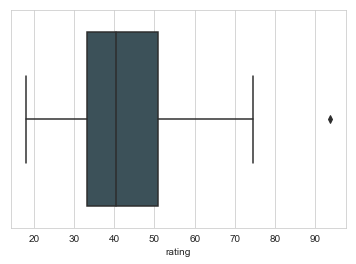

In [69]:
sns.boxplot(df['rating'])

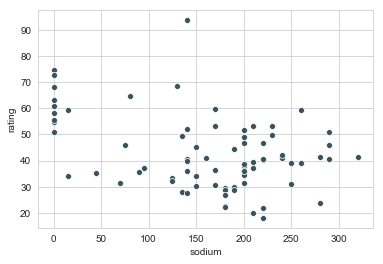

In [75]:
sns.scatterplot(data=df, x='sodium', y='rating')

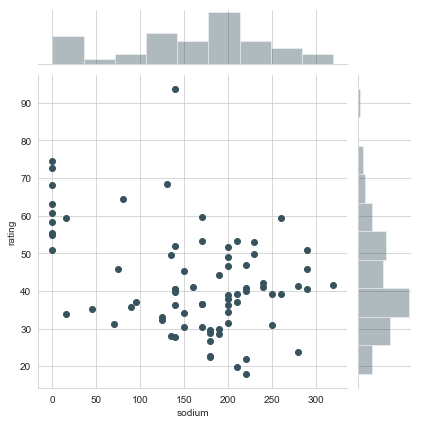

In [76]:
sns.jointplot(x='sodium', y='rating', data=df)

(array([ 1.,  0.,  0.,  1.,  0.,  3.,  3.,  8., 15.,  8., 15.,  9.,  1.,
        10.,  3.]),
 array([-1. ,  0.6,  2.2,  3.8,  5.4,  7. ,  8.6, 10.2, 11.8, 13.4, 15. ,
        16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 15 Patch objects>)

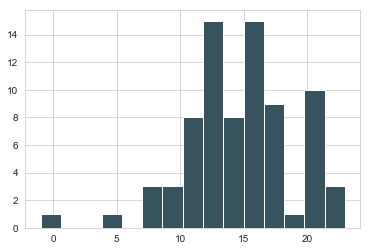

In [79]:
plt.hist(x='carbo',bins=15, data=df)

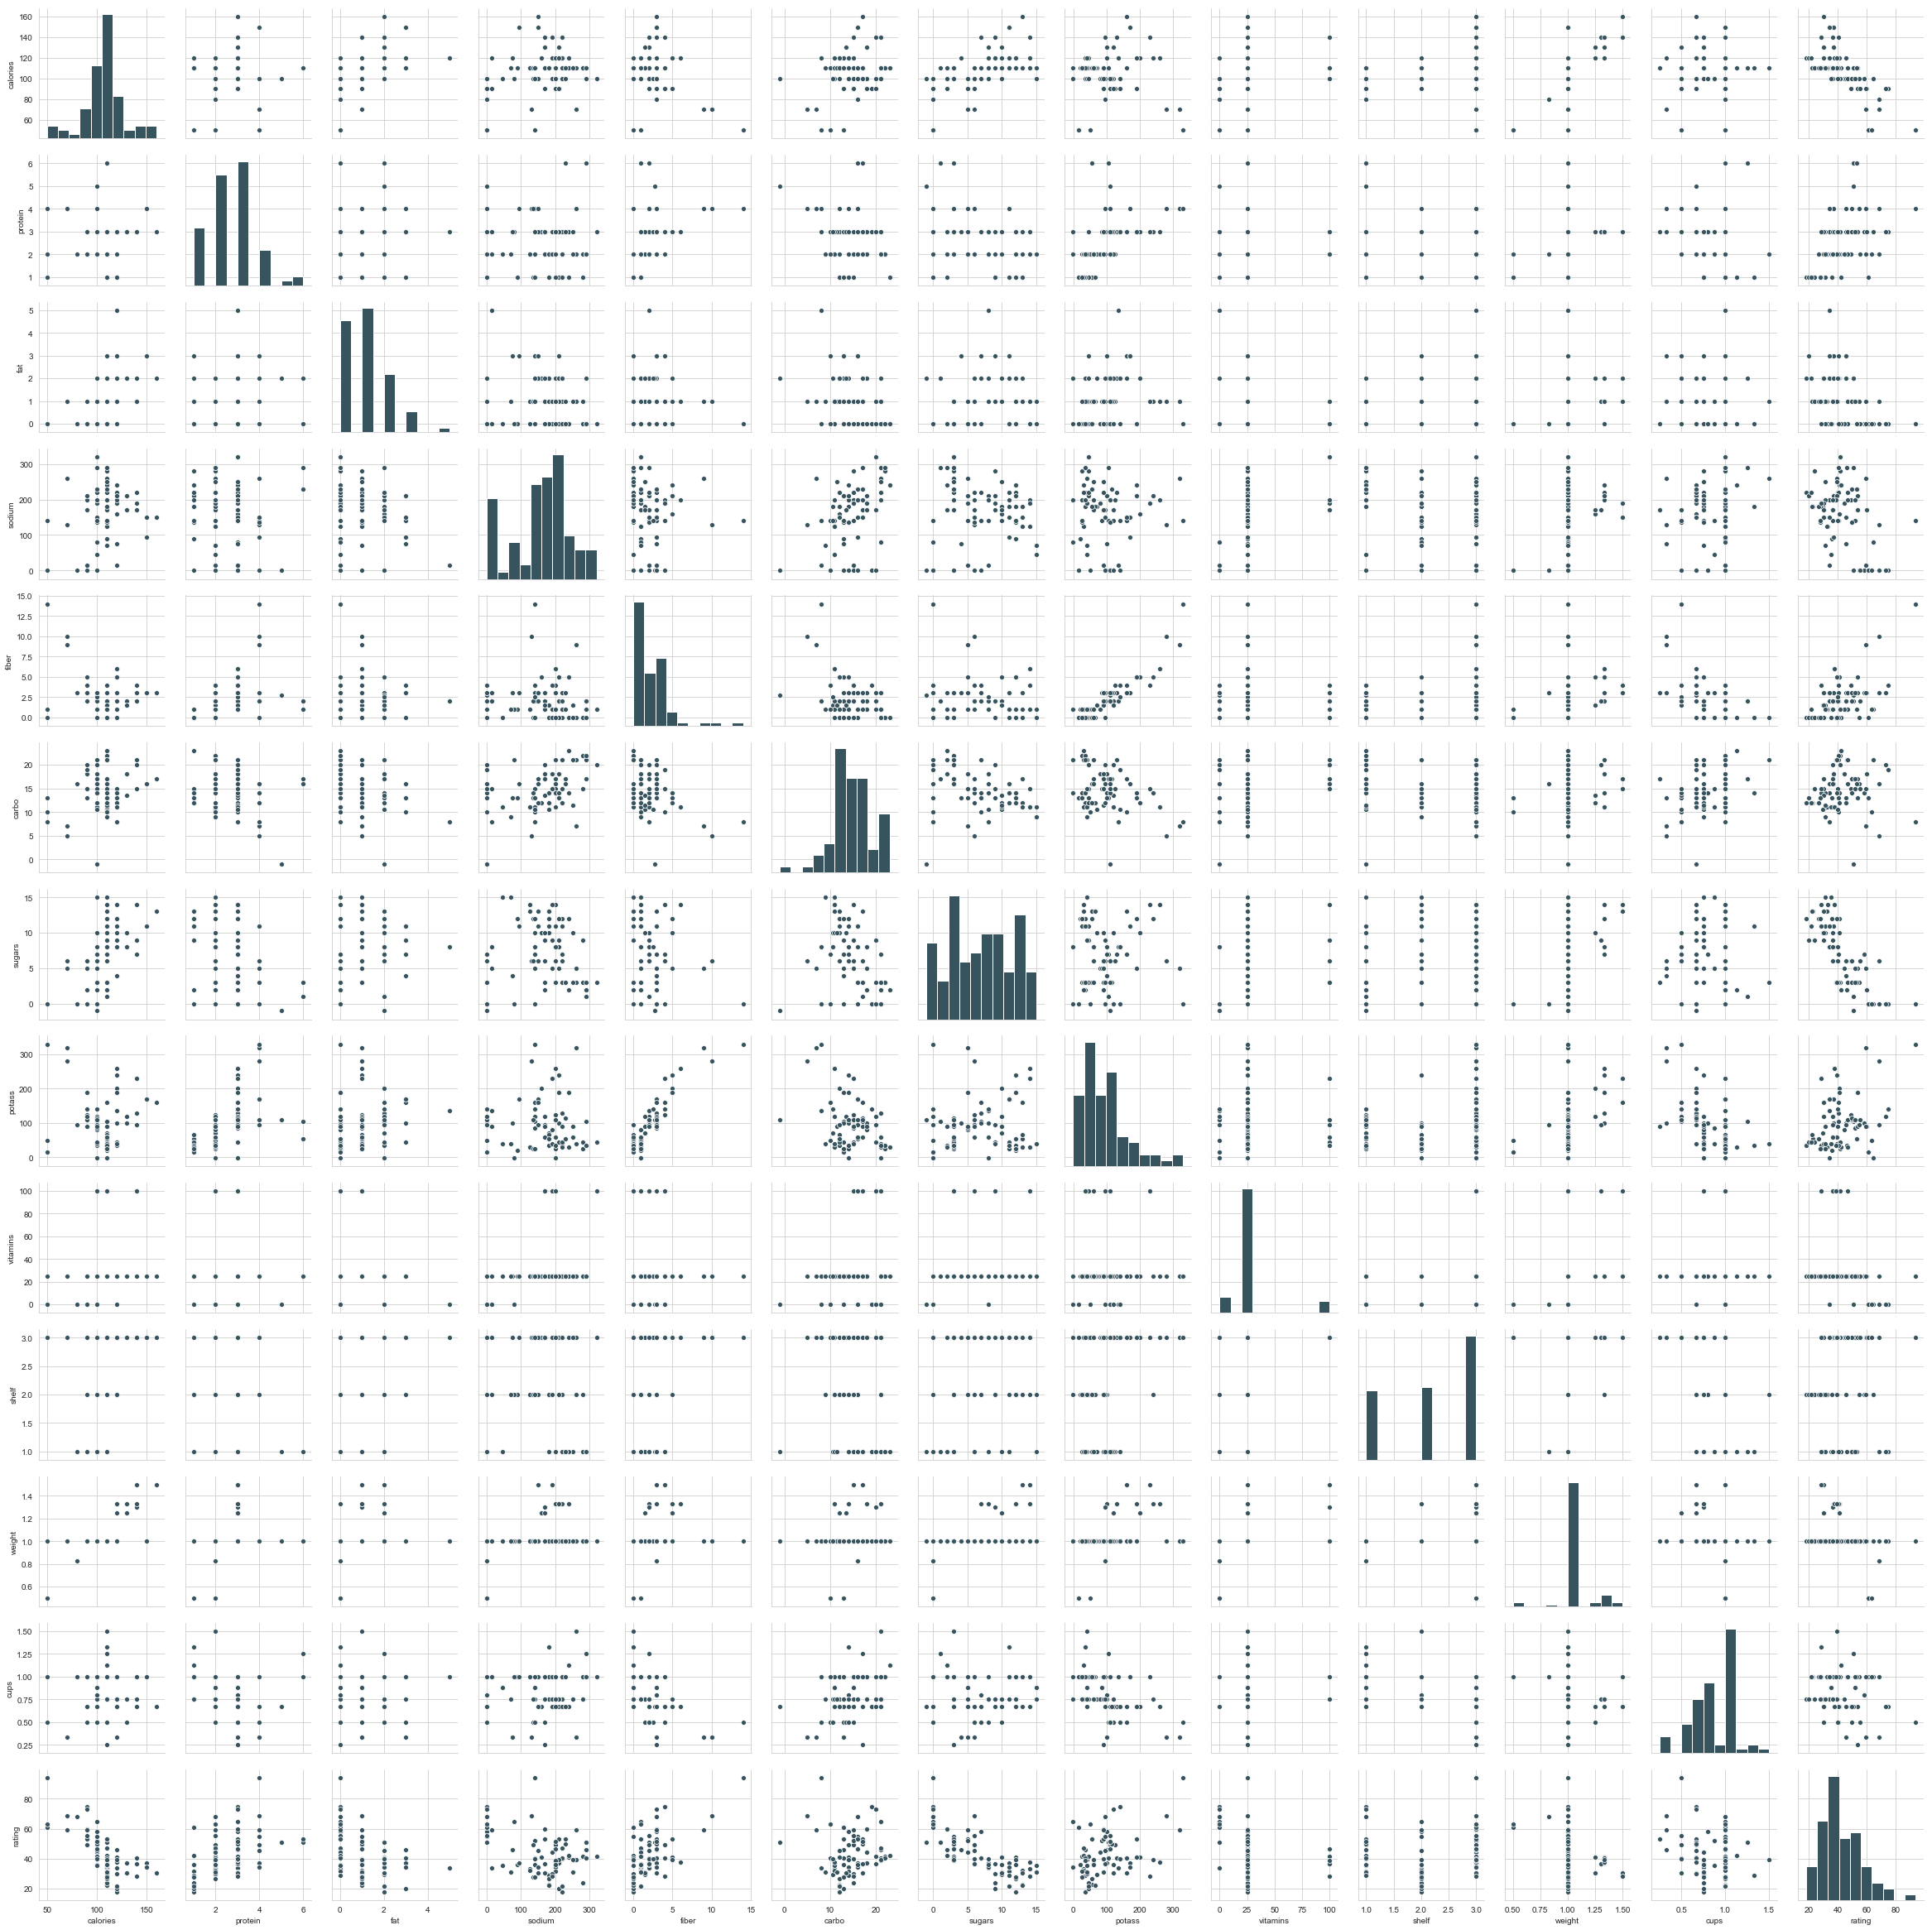

In [80]:
sns.pairplot(df)

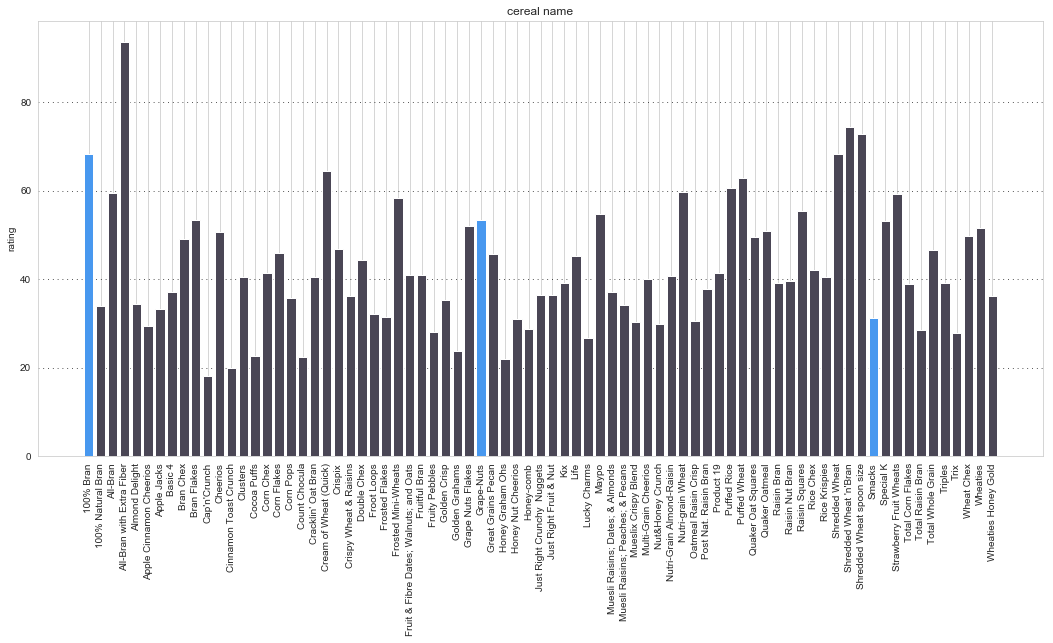

In [82]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
color_map = ["#4A4655" for _ in range(33)]
color_map[0] = "#4898EF"
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.bar(df["name"], df['rating'],color=color_map)
plt.ylabel("rating")
plt.title("cereal name")
plt.show()

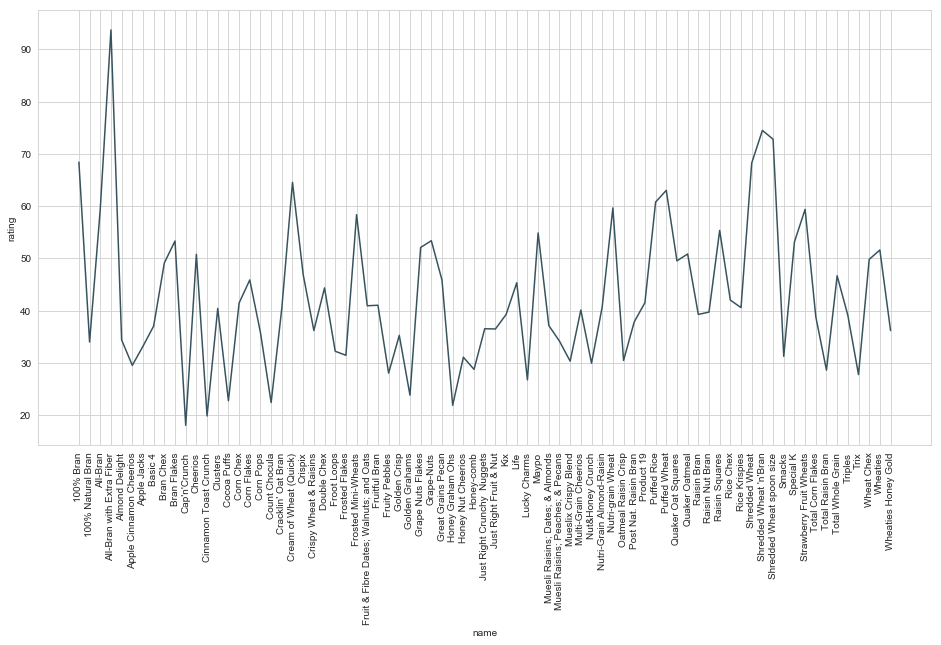

In [83]:
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
sns.lineplot(x="name", y = "rating", data = df)
plt.show()

In [85]:
df1=df.nlargest(5,'rating')
df1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


In [86]:
df2=df.nsmallest(5,'rating')
df2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446


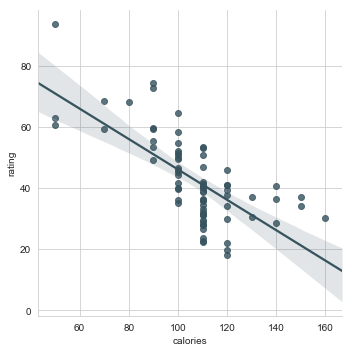

In [87]:
sns.lmplot(x='calories', y = 'rating', data=df)

In [88]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


Text(0.5, 1.0, 'Correlation Heatmap')

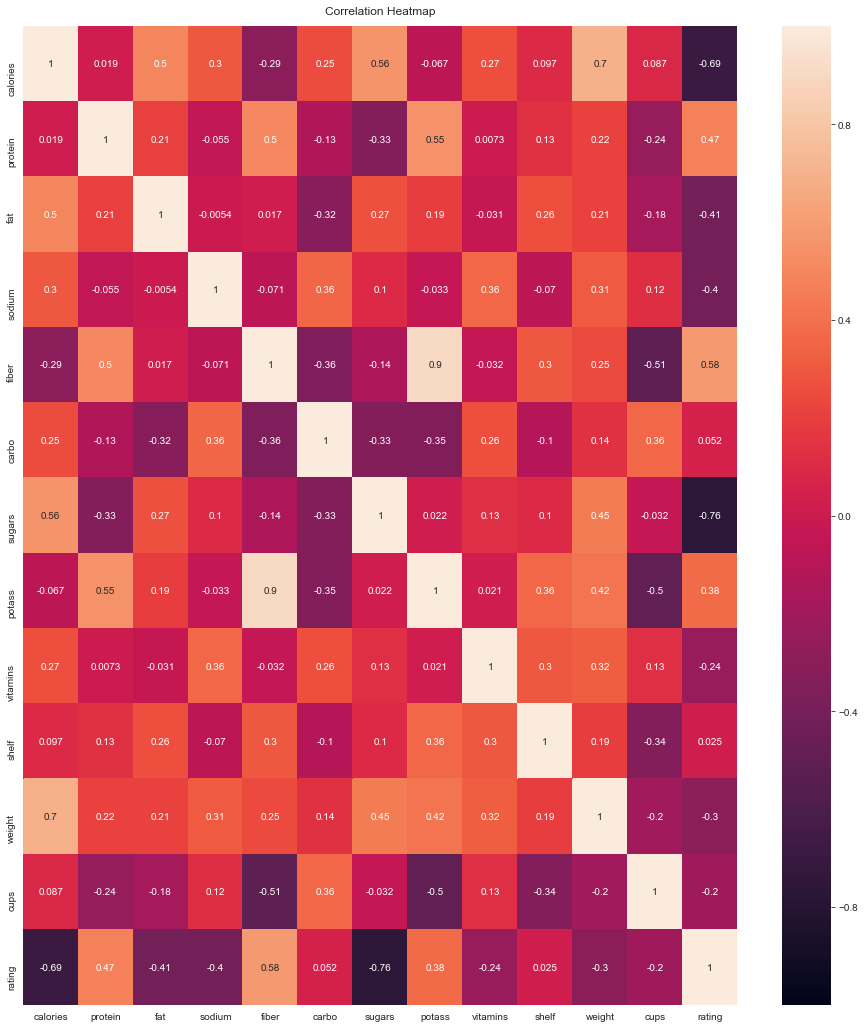

In [89]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [91]:
y = df['rating']
x = df['sugars']
x = sm.add_constant(x)
x.head()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,sugars
0,1.0,6
1,1.0,8
2,1.0,5
3,1.0,0
4,1.0,8


In [92]:
model = sm.OLS(y, x) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.15e-15
Time:                        04:34:12   Log-Likelihood:                -279.09
No. Observations:                  77   AIC:                             562.2
Df Residuals:                      75   BIC:                             566.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2844      1.948     30.426      0.000      55.403      63.166
sugars        -2.4008      0.237    -10.117      0.000      -2.874      -1.928
==============================================================================
Omnibus:                       13.573   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.301
Skew:                           0.828   Prob(JB):                     0.000289
Kurtosis:                       4.529   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
result.params

const     59.284367
sugars    -2.400820
dtype: float64

(array([ 5., 10., 20., 16., 13.,  8.,  3.,  1.,  0.,  1.]),
 array([-17.85341532, -12.62601933,  -7.39862333,  -2.17122734,
          3.05616866,   8.28356465,  13.51096065,  18.73835664,
         23.96575264,  29.19314863,  34.42054463]),
 <a list of 10 Patch objects>)

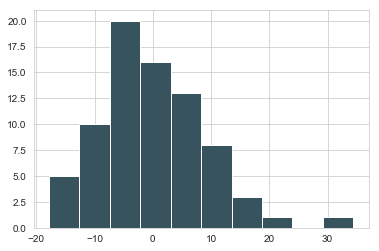

In [94]:
plt.hist(result.resid)

In [95]:
y = df['rating']
x = df[['sugars',
        'calories',
        'carbo']]

x = sm.add_constant(x)
x.head()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,sugars,calories,carbo
0,1.0,6,70,5.0
1,1.0,8,120,8.0
2,1.0,5,70,7.0
3,1.0,0,50,8.0
4,1.0,8,110,14.0


In [96]:
model = sm.OLS(y, x) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     51.55
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           5.34e-18
Time:                        04:37:21   Log-Likelihood:                -268.43
No. Observations:                  77   AIC:                             544.9
Df Residuals:                      73   BIC:                             554.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8422      5.591     15.174      0.000      73.699      95.985
sugars        -1.8349      0.314     -5.846      0.000      -2.460      -1.209
calories      -0.2521      0.070     -3.613      0.001      -0.391      -0.113
carbo         -0.1735      0.278     -0.623      0.535      -0.729       0.381
==============================================================================
Omnibus:                        2.615   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.592
Skew:                           0.413   Prob(JB):                        0.274
Kurtosis:                       2.647   Cond. No.                         664.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
result.params

const       84.842236
sugars      -1.834869
calories    -0.252072
carbo       -0.173540
dtype: float64

(array([ 3.,  9., 17., 12., 10., 11.,  8.,  5.,  1.,  1.]),
 array([-16.00023893, -12.11475761,  -8.22927629,  -4.34379498,
         -0.45831366,   3.42716766,   7.31264898,  11.1981303 ,
         15.08361161,  18.96909293,  22.85457425]),
 <a list of 10 Patch objects>)

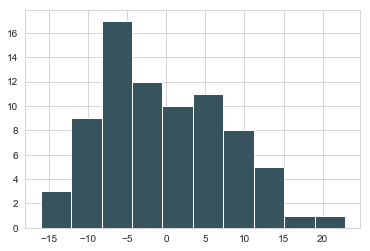

In [98]:
plt.hist(result.resid)